<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(_2)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,82.493827,60.420716,50.458842,-0.026786,203.346599,203.376367,-0.029768
1,0.0,1.0,95.238774,26.475166,93.873839,-0.036002,225.551777,225.591341,-0.039564
2,0.0,2.0,86.859562,58.590449,73.961782,-0.032065,229.379728,229.413686,-0.033958
3,0.0,3.0,72.434349,39.526409,20.855719,0.035710,142.852186,142.822405,0.029781
4,0.0,4.0,69.741561,92.238774,60.879596,0.001889,232.861820,232.859191,0.002629
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,89.533062,62.831174,63.328643,0.014712,225.707590,225.692457,0.015133
119996,999.0,116.0,33.724499,23.694507,33.036359,0.070289,100.525655,100.457590,0.068066
119997,999.0,117.0,35.602020,58.547933,31.732042,0.041285,135.923280,135.884288,0.038992
119998,999.0,118.0,74.417573,83.085259,72.757654,0.006399,240.266885,240.258919,0.007966


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    82.493827  60.420716  50.458842 -0.026786  203.346599   
      1.0    95.238774  26.475166  93.873839 -0.036002  225.551777   
      2.0    86.859562  58.590449  73.961782 -0.032065  229.379728   
      3.0    72.434349  39.526409  20.855719  0.035710  142.852186   
      4.0    69.741561  92.238774  60.879596  0.001889  232.861820   
...                ...        ...        ...       ...         ...   
999.0 115.0  89.533062  62.831174  63.328643  0.014712  225.707590   
      116.0  33.724499  23.694507  33.036359  0.070289  100.525655   
      117.0  35.602020  58.547933  31.732042  0.041285  135.923280   
      118.0  74.417573  83.085259  72.757654  0.006399  240.266885   
      119.0  25.725382  65.435541  57.930953 -0.011271  159.080605   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    203.376367 -0.029768  
      1.0    225.591341 -0.039564  
      2.0    229.413686 -0.033958  
      3.0    142.822405  0.029781  
      4.0    232.859191  0.002629  
...                 ...       ...  
999.0 115.0  225.692457  0.015133  
      116.0  100.457590  0.068066  
      117.0  135.884288  0.038992  
      118.0  240.258919  0.007966  
      119.0  159.091400 -0.010794  

[120000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    82.493827  60.420716  50.458842 -0.026786  203.346599   
      1.0    95.238774  26.475166  93.873839 -0.036002  225.551777   
      2.0    86.859562  58.590449  73.961782 -0.032065  229.379728   
      3.0    72.434349  39.526409  20.855719  0.035710  142.852186   
      4.0    69.741561  92.238774  60.879596  0.001889  232.861820   
...                ...        ...        ...       ...         ...   
999.0 115.0  89.533062  62.831174  63.328643  0.014712  225.707590   
      116.0  33.724499  23.694507  33.036359  0.070289  100.525655   
      117.0  35.602020  58.547933  31.732042  0.041285  135.923280   
      118.0  74.417573  83.085259  72.757654  0.006399  240.266885   
      119.0  25.725382  65.435541  57.930953 -0.011271  159.080605   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    203.376367 -0.029768  
      1.0    225.591341 -0.039564  
      2.0    229.413686 -0.033958  
      3.0    142.822405  0.029781  
      4.0    232.859191  0.002629  
...                 ...       ...  
999.0 115.0  225.692457  0.015133  
      116.0  100.457590  0.068066  
      117.0  135.884288  0.038992  
      118.0  240.258919  0.007966  
      119.0  159.091400 -0.010794  

[120000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,82.493827,60.420716,50.458842,-0.026786,203.346599,203.376367,-0.029768
1,0.0,1.0,95.238774,26.475166,93.873839,-0.036002,225.551777,225.591341,-0.039564
2,0.0,2.0,86.859562,58.590449,73.961782,-0.032065,229.379728,229.413686,-0.033958
3,0.0,3.0,72.434349,39.526409,20.855719,0.035710,142.852186,142.822405,0.029781
4,0.0,4.0,69.741561,92.238774,60.879596,0.001889,232.861820,232.859191,0.002629
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,89.533062,62.831174,63.328643,0.014712,225.707590,225.692457,0.015133
119996,999.0,116.0,33.724499,23.694507,33.036359,0.070289,100.525655,100.457590,0.068066
119997,999.0,117.0,35.602020,58.547933,31.732042,0.041285,135.923280,135.884288,0.038992
119998,999.0,118.0,74.417573,83.085259,72.757654,0.006399,240.266885,240.258919,0.007966


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    82.493827  60.420716  50.458842 -0.026786  203.346599   
      1.0    95.238774  26.475166  93.873839 -0.036002  225.551777   
      2.0    86.859562  58.590449  73.961782 -0.032065  229.379728   
      3.0    72.434349  39.526409  20.855719  0.035710  142.852186   
      4.0    69.741561  92.238774  60.879596  0.001889  232.861820   
...                ...        ...        ...       ...         ...   
999.0 115.0  89.533062  62.831174  63.328643  0.014712  225.707590   
      116.0  33.724499  23.694507  33.036359  0.070289  100.525655   
      117.0  35.602020  58.547933  31.732042  0.041285  135.923280   
      118.0  74.417573  83.085259  72.757654  0.006399  240.266885   
      119.0  25.725382  65.435541  57.930953 -0.011271  159.080605   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    203.376367 -0.029768  
      1.0    225.591341 -0.039564  
      2.0    229.413686 -0.033958  
      3.0    142.822405  0.029781  
      4.0    232.859191  0.002629  
...                 ...       ...  
999.0 115.0  225.692457  0.015133  
      116.0  100.457590  0.068066  
      117.0  135.884288  0.038992  
      118.0  240.258919  0.007966  
      119.0  159.091400 -0.010794  

[120000 rows x 7 columns]

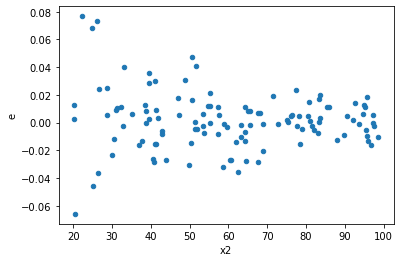

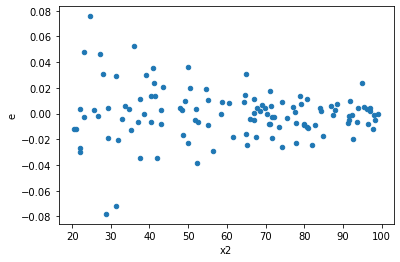

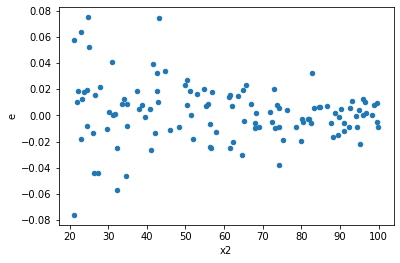

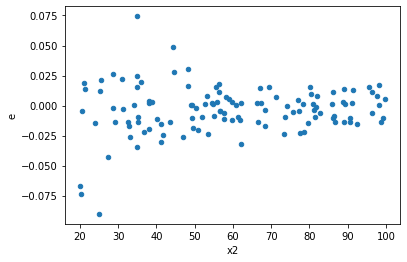

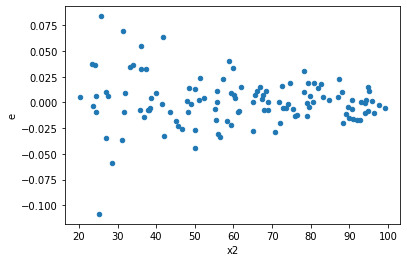

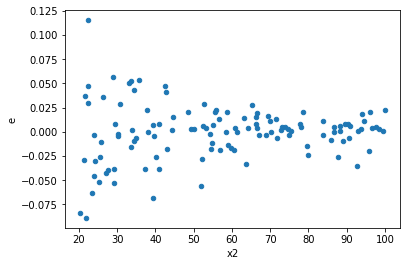

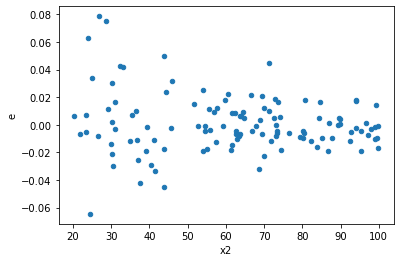

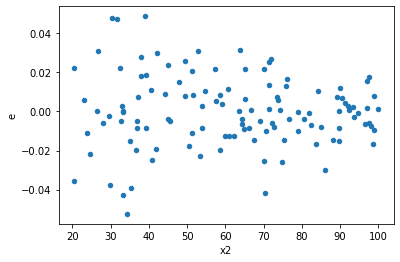

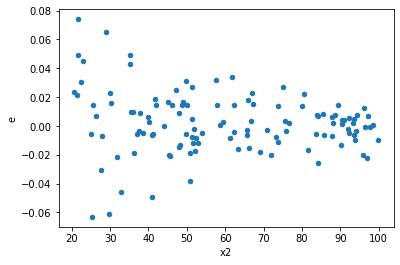

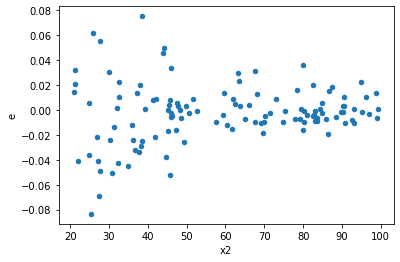

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,59.0,55.0,0.012200233237573061,0.03886496109492221,0.0002067836141961536,0.000706635656271313,3.4172710396724324,8.59607707948129e-06,0.9999957019614603,4.298038539740645e-06,Reject001=0 : Heteroscedasticity
1.0,47.0,67.0,0.007202671289617738,0.04117839035679698,0.0001532483253110157,0.0006146028411462236,4.010502822128035,2.438346566879801e-07,0.9999998780826717,1.2191732834399005e-07,Reject001=0 : Heteroscedasticity
2.0,46.0,68.0,0.009344740630360643,0.05045717534842609,0.00020314653544262266,0.0007420172845356778,3.6526209168123147,1.3620080354659336e-06,0.9999993189959823,6.810040177329668e-07,Reject001=0 : Heteroscedasticity
3.0,64.0,50.0,0.01253354267626344,0.03346781711896307,0.00019583660431661624,0.0006693563423792614,3.4179327440598817,1.415182089670175e-05,0.9999929240895516,7.075910448350875e-06,Reject001=0 : Heteroscedasticity
4.0,52.0,62.0,0.014521322796292938,0.04930000162424659,0.000279256207621018,0.0007951613165201063,2.847425750331858,9.695884048599446e-05,0.999951520579757,4.847942024299723e-05,Reject001=0 : Heteroscedasticity
6.0,67.0,47.0,0.02676272778266226,0.022120964684944535,0.00039944369824869045,0.00047065882308392626,1.1782857637946709,0.5565235329065314,0.7217382335467343,0.2782617664532657,Reject001=1 : Homoscedasticity
9.0,55.0,59.0,0.013172676455051754,0.05222467456624018,0.00023950320827366826,0.000885163975698986,3.6958334799739037,1.6885983533665438e-06,0.9999991557008233,8.442991766832719e-07,Reject001=0 : Heteroscedasticity
15.0,75.0,39.0,0.022835875271942085,0.05204612189065611,0.0003044783369592278,0.0013345159459142593,4.382958601396204,2.4473084079268403e-06,0.999998776345796,1.2236542039634202e-06,Reject001=0 : Heteroscedasticity
16.0,59.0,55.0,0.016106667822506034,0.04816302371587614,0.0002729943698729836,0.0008756913402886571,3.207726740650699,2.301427598405681e-05,0.999988492862008,1.1507137992028404e-05,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,59.0,55.0,0.012200233237573061,0.03886496109492221,0.0002067836141961536,0.000706635656271313,3.4172710396724324,8.59607707948129e-06,Reject001=0 : Heteroscedasticity
1.0,47.0,67.0,0.007202671289617738,0.04117839035679698,0.0001532483253110157,0.0006146028411462236,4.010502822128035,2.438346566879801e-07,Reject001=0 : Heteroscedasticity
2.0,46.0,68.0,0.009344740630360643,0.05045717534842609,0.00020314653544262266,0.0007420172845356778,3.6526209168123147,1.3620080354659336e-06,Reject001=0 : Heteroscedasticity
3.0,64.0,50.0,0.01253354267626344,0.03346781711896307,0.00019583660431661624,0.0006693563423792614,3.4179327440598817,1.415182089670175e-05,Reject001=0 : Heteroscedasticity
4.0,52.0,62.0,0.014521322796292938,0.04930000162424659,0.000279256207621018,0.0007951613165201063,2.847425750331858,9.695884048599446e-05,Reject001=0 : Heteroscedasticity
5.0,55.0,59.0,0.0738126660010104,0.022488080174056745,0.0013420484727456436,0.00038115390125519907,0.2840090421439186,5.329648049476442e-06,Reject001=0 : Heteroscedasticity
6.0,67.0,47.0,0.02676272778266226,0.022120964684944535,0.00039944369824869045,0.00047065882308392626,1.1782857637946709,0.5565235329065314,Reject001=1 : Homoscedasticity
7.0,66.0,48.0,0.02846357793298759,0.008038108322979617,0.0004312663323179938,0.00016746059006207537,0.3882997060354771,0.00038856510876668864,Reject001=0 : Heteroscedasticity
8.0,64.0,50.0,0.039751409407155054,0.011411381812621324,0.0006211157719867977,0.00022822763625242649,0.3674478197878988,0.0001804284225672191,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    649
Reject001=1 : Homoscedasticity      351
Name: Result_test, dtype: int64